In [2]:
import seaborn as sns

In [3]:
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [7]:
flight = sns.load_dataset('flights')
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [8]:
flight2 = flight.set_index(['year', 'month']).unstack()
flight2

passengers                                                       
month        Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                                   
1949         112  118  132  129  121  135  148  148  136  119  104  118
1950         115  126  141  135  125  149  170  170  158  133  114  140
1951         145  150  178  163  172  178  199  199  184  162  146  166
1952         171  180  193  181  183  218  230  242  209  191  172  194
1953         196  196  236  235  229  243  264  272  237  211  180  201
1954         204  188  235  227  234  264  302  293  259  229  203  229
1955         242  233  267  269  270  315  364  347  312  274  237  278
1956         284  277  317  313  318  374  413  405  355  306  271  306
1957         315  301  356  348  355  422  465  467  404  347  305  336
1958         340  318  362  348  363  435  491  505  404  359  310  337
1959         360  342  406  396  420  472  548  559  463  407  362  405
1960         417  391  419  461  472  535  622  606  508  461  390  432

In [9]:
label = flight2.columns.get_level_values('month')
label

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=False, dtype='category', name='month')

In [10]:
flight2 = flight2.values
flight2

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]],
      dtype=int64)

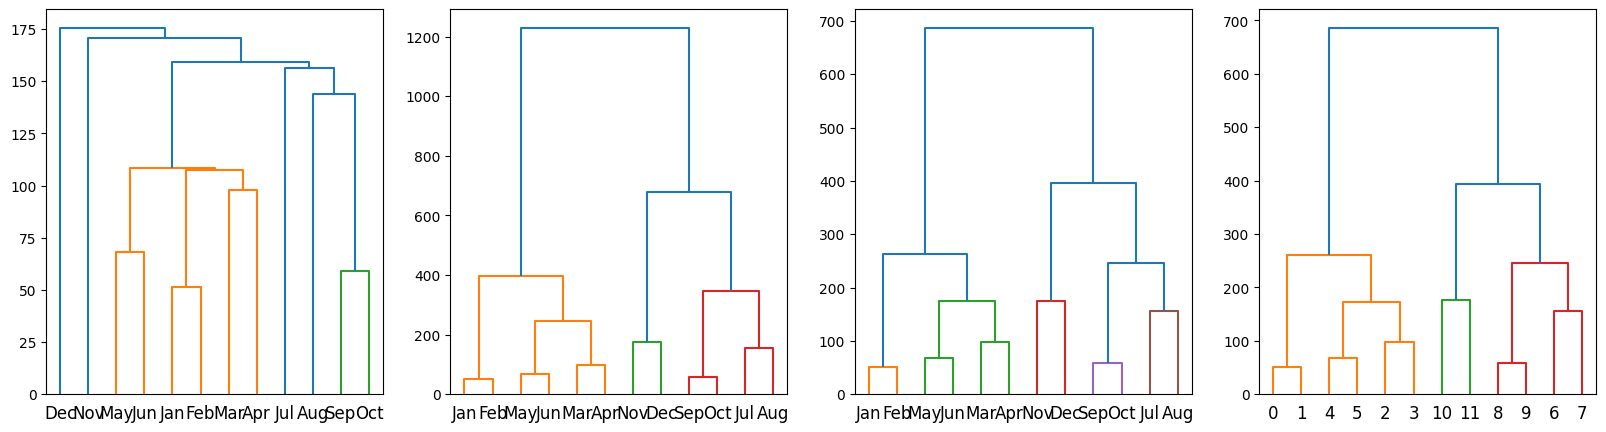

In [18]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1,4,1)
dend1 = sch.linkage(flight2, method = 'single')
cutoff = 0.7* max(dend1[:, 2])
dend_res1 = sch.dendrogram(dend1, color_threshold = cutoff)
ax1.set_xticklabels(label[dend_res1['leaves']], minor=False)

ax2 = fig.add_subplot(1,4,2)
dend2 = sch.linkage(flight2, method = 'complete')
cutoff = 0.5* max(dend2[:, 2])
dend_res2 = sch.dendrogram(dend2, color_threshold = cutoff)
ax2.set_xticklabels(label[dend_res2['leaves']], minor=False)

ax3 = fig.add_subplot(1,4,3)
dend3 = sch.linkage(flight2, method = 'average')
cutoff = 0.3* max(dend3[:, 2])
dend_res3 = sch.dendrogram(dend3, color_threshold = cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

ax4 = fig.add_subplot(1,4,4)
dend4 = sch.linkage(flight2, method = 'centroid')
cutoff = 0.5* max(dend4[:, 2])
dend_res4 = sch.dendrogram(dend4, color_threshold = cutoff)
ax3.set_xticklabels(label[dend_res4['leaves']], minor=False)


plt.show()

In [16]:
dend1, dend2, dend3

(array([[  0.        ,   1.        ,  51.32250968,   2.        ],
        [  8.        ,   9.        ,  58.93216439,   2.        ],
        [  4.        ,   5.        ,  68.30080527,   2.        ],
        [  2.        ,   3.        ,  97.88769075,   2.        ],
        [ 12.        ,  15.        , 107.60111524,   4.        ],
        [ 14.        ,  16.        , 108.35128056,   6.        ],
        [  7.        ,  13.        , 143.67324038,   3.        ],
        [  6.        ,  18.        , 156.52156401,   4.        ],
        [ 17.        ,  19.        , 159.07545379,  10.        ],
        [ 10.        ,  20.        , 170.62239009,  11.        ],
        [ 11.        ,  21.        , 175.6587601 ,  12.        ]]),
 array([[0.00000000e+00, 1.00000000e+00, 5.13225097e+01, 2.00000000e+00],
        [8.00000000e+00, 9.00000000e+00, 5.89321644e+01, 2.00000000e+00],
        [4.00000000e+00, 5.00000000e+00, 6.83008053e+01, 2.00000000e+00],
        [2.00000000e+00, 3.00000000e+00, 9.7887690